In [1]:
import os
import sys
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from ibopf.settings import settings
from ibopf.avocado_adapter import Dataset, MMMBOPFFeaturizer, AVOCADOFeaturizer
from ibopf import IBOPF, CompactIBOPF
# we move to the main directory so the default settings load, you can always load new settings through a user_settings.json dictionary
# %cd .. 
%cd D:/tesis

D:\tesis


In [2]:
def load_features(dataset_name, method="IBOPF", tag="features_v3_LSA"):
    # Load the dataset (metadata only)
    print("Loading dataset '%s'..." % dataset_name)
    dataset = Dataset.load(dataset_name, metadata_only=True)
    dataset.set_method(method)
    
    # Load the dataset features depending on method
    print("Loading features...")
    if method == "IBOPF":
        dataset.load_compact_features(features_tag=tag)
        featurizer = MMMBOPFFeaturizer(include_metadata=True)
    else:
        dataset.load_raw_features()
        featurizer = AVOCADOFeaturizer()
        
    df_features = dataset.select_features(featurizer)
        
        
        
    return df_features, dataset.metadata["class"]

In [3]:
avocado_fea, avocado_labels = load_features("plasticc_augment_v3", method="AVOCADO")
print(avocado_fea.shape)
avocado_fea.head()

Loading dataset 'plasticc_augment_v3'...
Loading features...
(80856, 41)


,host_photoz,host_photoz_error,length_scale,max_mag,pos_flux_ratio,max_flux_ratio_red,max_flux_ratio_blue,min_flux_ratio_red,min_flux_ratio_blue,max_dt,...,count_max_rise_100,count_max_fall_20,count_max_fall_50,count_max_fall_100,peak_frac_2,total_s2n,percentile_diff_10_50,percentile_diff_30_50,percentile_diff_70_50,percentile_diff_90_50
object_id,,,,,,,,,,,,,,,,,,,,,
plasticc_000000615,0.0,0.0,0.810587,-7.065665,0.617706,0.408176,0.625225,0.467499,0.618597,-1.0,...,58,27,55,65,0.937435,1680.334319,-0.331157,-0.241635,0.281992,0.526983
plasticc_000000615_aug_AbjDyHvcjX,0.0,0.0,1.986950,-6.432996,0.611081,0.462652,0.614419,0.442930,0.636407,-73.0,...,38,14,20,20,0.986236,559.431198,-0.282959,-0.201267,0.220213,0.488328
plasticc_000000615_aug_AsmspjWzJm,0.0,0.0,1.679606,-6.655993,0.667554,0.439925,0.559108,0.414655,0.586028,-52.0,...,46,19,23,23,0.929346,553.432737,-0.177502,-0.146433,0.235733,0.460614
plasticc_000000615_aug_BKCzLjGtRi,0.0,0.0,3.306436,-6.497136,0.661442,0.389915,0.522879,0.529953,0.631806,-723.0,...,43,11,19,19,0.946962,486.709651,-0.219526,-0.128570,0.266285,0.427889
plasticc_000000615_aug_BTzTrkiBQL,0.0,0.0,2.403185,-7.079541,0.680899,0.401509,0.600447,0.504744,0.667935,-342.0,...,28,17,26,33,0.950321,580.062596,-0.224600,-0.106573,0.231669,0.567769


In [4]:
ibopf_fea, ibopf_labels = load_features("plasticc_augment_v3", method="IBOPF", tag="features_v3_LSA")
print(ibopf_fea.shape)
ibopf_fea.head()

Loading dataset 'plasticc_augment_v3'...
Loading features...
raw compact features shape: (80856, 361)
(80856, 363)


,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea354,fea355,fea356,fea357,fea358,fea359,fea360,fea361,host_photoz,host_photoz_error
object_id,,,,,,,,,,,,,,,,,,,,,
plasticc_000000615,0.518071,0.427548,-0.263188,0.293871,-0.132929,0.030204,0.044281,0.071112,-0.094896,-0.093709,...,0.011064,0.008378,-0.017447,-0.015078,0.016279,-0.007820,-0.009198,0.015981,0.0,0.0
plasticc_000000615_aug_AbjDyHvcjX,0.495914,0.447930,-0.259099,0.223225,0.004493,-0.009399,0.120437,0.030973,-0.062315,-0.101891,...,0.002941,0.012499,-0.037316,0.005278,-0.003837,-0.004988,0.005561,0.000381,0.0,0.0
plasticc_000000615_aug_AsmspjWzJm,0.561952,0.327501,-0.348189,0.234282,-0.201789,-0.018615,-0.008638,-0.015593,-0.045985,-0.056730,...,0.018275,0.001461,-0.001295,-0.005594,0.009484,-0.019114,0.001063,-0.004862,0.0,0.0
plasticc_000000615_aug_BKCzLjGtRi,0.583614,0.352556,-0.240495,0.167820,0.021985,0.001247,-0.022133,0.015532,-0.243475,-0.006601,...,-0.002931,0.014068,0.026559,0.003132,0.001329,-0.007439,-0.003976,-0.002026,0.0,0.0
plasticc_000000615_aug_BTzTrkiBQL,0.493466,0.413772,-0.261762,0.221495,-0.048455,-0.059570,-0.009826,0.057383,-0.165776,-0.001519,...,0.007696,-0.001362,0.011880,-0.011985,-0.005974,0.012815,0.002378,0.009326,0.0,0.0


In [19]:
plot_labels_extra_short = {
    6: 'Single microlens',
    15: 'TDE',
    16: 'Eclip. Binary',
    42: 'SNII',
    52: 'SNIax',
    53: 'Mira',
    62: 'SNIbc',
    64: 'Kilonova',
    65: 'M-dwarf',
    67: 'SNIa-91bg',
    88: 'AGN',
    90: 'SNIa',
    92: 'RR lyrae',
    95: 'SLSN-I',
    99: 'Unknown',
} 

def prepare_labels(labels):
    labels_verbose =  [plot_labels_extra_short[x] for x in labels]
    print(np.unique(labels_verbose))
    le = LabelEncoder()
    le.fit(np.unique(labels_verbose))
    y = le.transform(labels_verbose)
    return y, le

def visualization2D(df, y, le, reducer="UMAP"):
    fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
    cax = ax.scatter(df[:, 0], df[:, 1], c=y, marker='.', s=1)
    ax.set_xlabel("%s 1" % reducer)
    ax.set_ylabel("%s 2" % reducer)
    ax.legend();
    cbar = plt.colorbar(cax, orientation='horizontal')
    cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                       labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
    cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
    plt.show()
    
def visualization3D(df, y, le, reducer="UMAP"):
    fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
    ax = plt.axes(projection='3d')
    cax = ax.scatter(df[:, 0], df[:, 1], df[:, 2],  c=y, marker='.', s=1)
    ax.set_xlabel("%s 1" % reducer)
    ax.set_ylabel("%s 2" % reducer)
    ax.set_zlabel("%s 3" % reducer)
    ax.legend();
    cbar = plt.colorbar(cax, orientation='horizontal')
    cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                       labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
    cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
    plt.show()

    


## Visualize IBOPF-LSA with UMAP

In [12]:
scaler = StandardScaler()
scaler.fit(ibopf_fea)
df_scaled = scaler.transform(ibopf_fea)

reducer = umap.UMAP()
df_umap = reducer.fit_transform(df_scaled)

['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


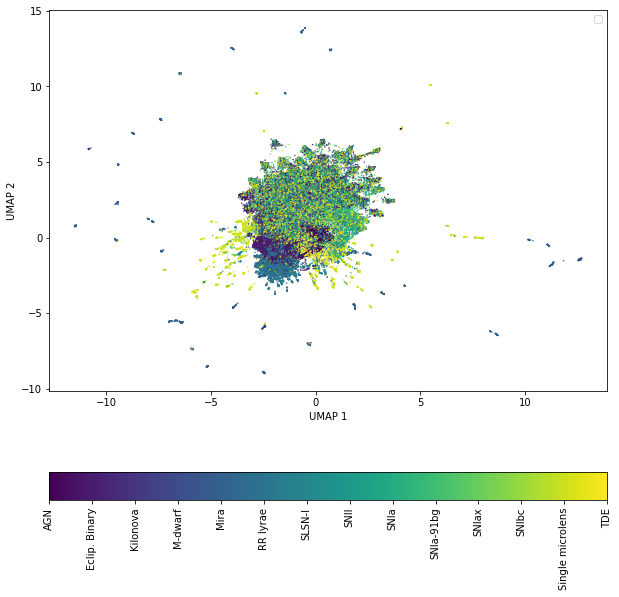

In [15]:
# visualize ibopf lsa with UMAP
y, le = prepare_labels(ibopf_labels)
visualization2D(df_umap, y, le, reducer="UMAP")

## Visualize AVOCADO with UMAP

['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


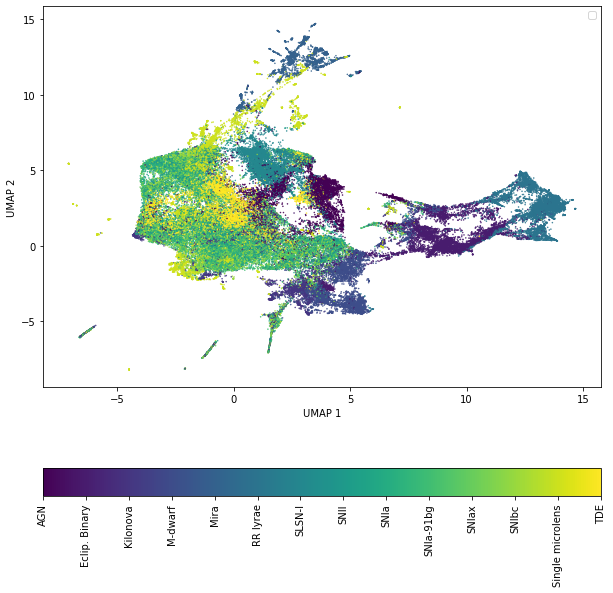

In [18]:
# we need to drop features that are nan
df_reduced = avocado_fea.drop(columns=avocado_fea.columns[avocado_fea.isna().any()].tolist())


scaler = StandardScaler()
scaler.fit(df_reduced)
df_scaled = scaler.transform(df_reduced)

reducer = umap.UMAP()
df_umap = reducer.fit_transform(df_scaled)

# visualize ibopf lsa with UMAP
y, le = prepare_labels(avocado_labels)
visualization2D(df_umap, y, le, reducer="UMAP")

## Visualize AVOCADO+IBOPF-LSA with UMAP

In [6]:
df_reduced = avocado_fea.drop(columns=avocado_fea.columns[avocado_fea.isna().any()].tolist())
for col in ibopf_fea.columns:
    if "fea" in col:
        df_reduced[col] = ibopf_fea[col]

D:\miniconda\envs\tesis\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


D:\miniconda\envs\tesis\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


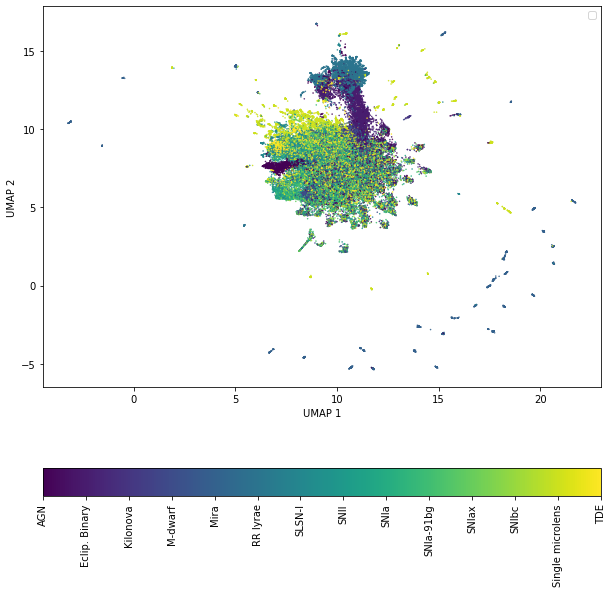

In [8]:
# we need to drop features that are nan
df_reduced = avocado_fea.drop(columns=avocado_fea.columns[avocado_fea.isna().any()].tolist())
for col in ibopf_fea.columns:
    if "fea" in col:
        df_reduced[col] = ibopf_fea[col]



scaler = StandardScaler()
scaler.fit(df_reduced)
df_scaled = scaler.transform(df_reduced)

reducer = umap.UMAP()
df_umap = reducer.fit_transform(df_scaled)

# visualize ibopf lsa with UMAP
y, le = prepare_labels(avocado_labels)
visualization2D(df_umap, y, le, reducer="UMAP")

## Visualize IBOPF-LSA with UMAP-3D

In [11]:
scaler = StandardScaler()
scaler.fit(ibopf_fea)
df_scaled = scaler.transform(ibopf_fea)

reducer = umap.UMAP(n_components=3)
df_umap = reducer.fit_transform(df_scaled)

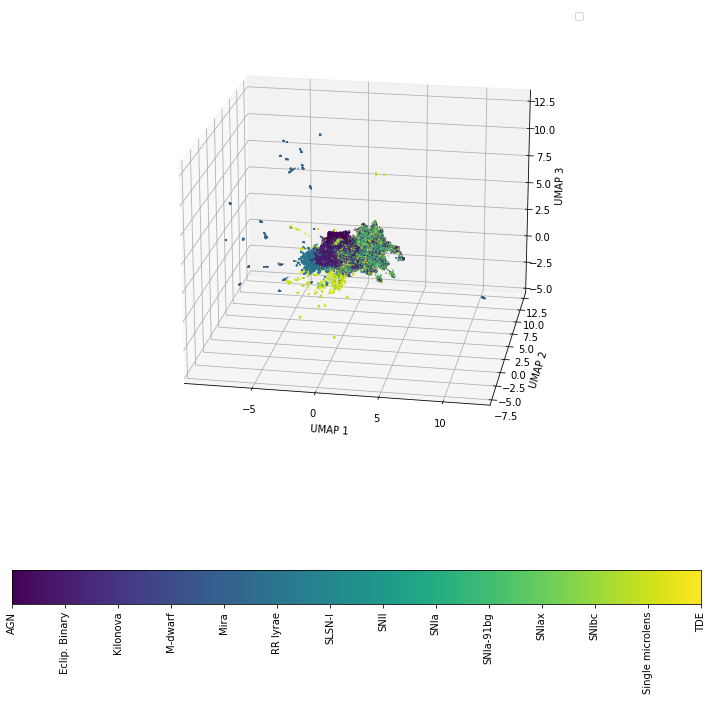

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
cax = ax.scatter(df_umap[:, 0], df_umap[:, 1], df_umap[:, 2],  c=y, marker='.', s=1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.legend();
cbar = plt.colorbar(cax, orientation='horizontal')
cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                   labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
# plt.show()

ax.view_init(20, -80)
plt.tight_layout()

## Visualize AVOCADO with UMAP-3D

In [46]:
# we need to drop features that are nan
df_reduced = avocado_fea.drop(columns=avocado_fea.columns[avocado_fea.isna().any()].tolist())

scaler = StandardScaler()
scaler.fit(df_reduced)
df_scaled = scaler.transform(df_reduced)

reducer = umap.UMAP(n_components=3)
df_umap = reducer.fit_transform(df_scaled)



['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


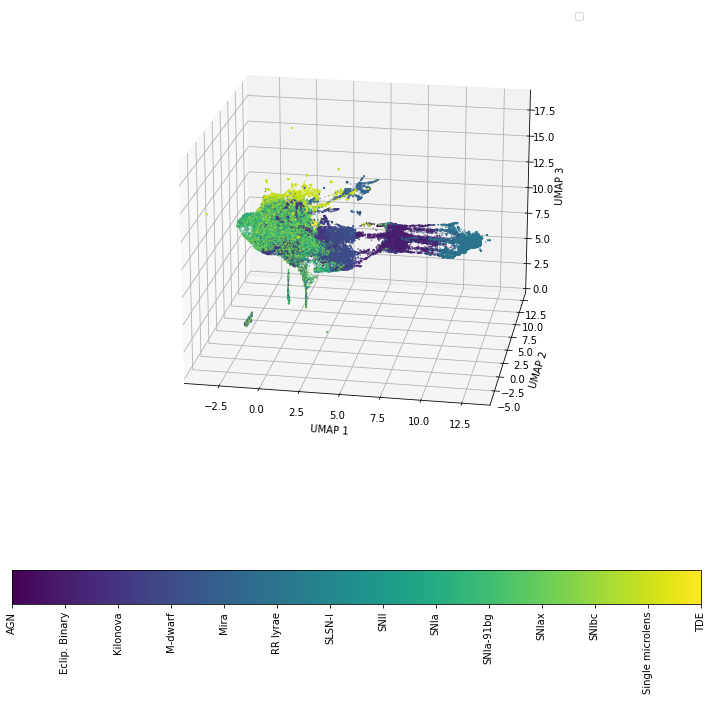

In [47]:
y, le = prepare_labels(avocado_labels)
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
cax = ax.scatter(df_umap[:, 0], df_umap[:, 1], df_umap[:, 2],  c=y, marker='.', s=1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.legend();
cbar = plt.colorbar(cax, orientation='horizontal')
cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                   labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
# plt.show()

ax.view_init(20, -80)
plt.tight_layout()

In [1]:
import os
import sys
main_path = os.path.abspath(os.path.join(os.path.dirname("./resolution_search.ipynb"), '..'))
print(main_path)
sys.path.insert(0, main_path)
from src.preprocesing import get_mmbopf_plasticc_path, rearrange_splits, gen_dataset_from_h5
from src.mmmbopf.method import IBOPF
from src.mmmbopf.models import CompactIBOPF
from src.feature_selection.analysis_of_variance import manova_rank_fast
import numpy as np
from scipy import sparse
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import json

data_path = get_mmbopf_plasticc_path()
print(data_path)
resolution_search_main_directory = os.path.join(data_path, "resolution_search")
print(resolution_search_main_directory)
import joblib
import avocado
from statsmodels.multivariate.manova import MANOVA
plt.style.use('seaborn')
%matplotlib inline

D:\tesis
../data/plasticc/IBOPF
../data/plasticc/IBOPF\resolution_search


In [2]:
filepath = "D:/tesis/data/plasticc/IBOPF/models/features_v3_zero_variance_model.pkl"
pipeline = joblib.load(filepath)

In [3]:
features = avocado.read_dataframe(
    "D:/tesis/data/plasticc/IBOPF/sparse_features/features_v3_LSA_plasticc_augment_v3.h5",
    "features",
)
print(features.shape)
features2 = pipeline.transform(features)
print(features2.shape)

(80856, 816)
(80856, 768)


In [4]:
sparse_features = sparse.csr_matrix(features.values)

In [5]:
metadata = avocado.load("plasticc_augment_v3", metadata_only=True)
labels = metadata.metadata["class"].to_numpy()

In [6]:
%%time
method = IBOPF()
method.config_from_json("D:/tesis/data/plasticc/IBOPF/optimal_config_lsa.json")
method.print_config()

CONFIG FOR GENERAL IBOPF:
>> ALPHA:  4
>> STATISTICAL QUANTITIES:  (TrMm-MmMn-MmMx-TrMn)
>> LEVELS OF RESOLUTION:  [[110.428, 1], [406.482, 1]]
Wall time: 997 µs


In [16]:
%%time
method.C = "LSA"
model_lsa = CompactIBOPF(method="LSA")
model_lsa.set_pipeline(method, 6, 768, None)
model_lsa.pipeline.named_steps["lsa"].sc = 816
model_lsa.fit(sparse_features)
lsa_features = model_lsa.transform(sparse_features)

In [7]:
%%time
method.C = "MANOVA"
model_manova = CompactIBOPF(method="MANOVA")
model_manova.set_pipeline(method, 6, 816//6, None)
model_manova.pipeline.named_steps["manova"].k = 816//6
model_manova.fit(sparse_features, y=labels)
manova_features = model_manova.transform(sparse_features)
manova_features = manova_features.toarray()

C:\ProgramData\Miniconda3\envs\py37\lib\site-packages\numba\core\ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'parameters' of function 'feature_grouping_fast'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\src\feature_selection\analysis_of_variance.py", line 10:
@jit(nopython=True)
def feature_grouping_fast(X, n_features, n_variables, parameters):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


8/136 features failed because of absence of dependent variables
Wall time: 6.69 s


In [8]:
def k_top_mask(scores, k, parameters, n_variables):
    mask = np.zeros(scores.shape, dtype=bool)
    mask[np.argsort(scores, kind="mergesort")[-k:]] = 1
    
    bop_sizes = []
    for param in parameters:
        (win, wl, q, alpha, q_symbol, tol, mean_bp, num_reduction, threshold) = param
        bop_size = (np.array(alpha).prod() + 1) ** wl
        bop_sizes.append(bop_size)
            
    mask_extended = np.zeros(mask.shape[0] * n_variables, dtype=bool)

    k = 0
    for bsize in bop_sizes:
        for i in range(bsize):
            mask_val = mask[k + i]
            for j in range(n_variables):
                mask_extended[k * n_variables + bsize * j + i] = mask_val
        k += bsize

    return mask_extended

def cum_explained_variance_manova(X, scores, parameters, n_variables, normalize=True):
    cum_exp_var = [0]
    var_full = np.var(X, axis=0).sum()
    for k in range(1, len(scores)):
        mask = k_top_mask(scores, k, parameters, n_variables)
        reduced = X[:, mask]
        cum_exp_var_k = np.var(reduced, axis=0).sum() / var_full
        cum_exp_var.append(cum_exp_var_k)
        
    if normalize:
        cum_exp_var = (cum_exp_var - np.min(cum_exp_var))/(np.max(cum_exp_var)-np.min(cum_exp_var))
        
    return cum_exp_var
    
    

In [9]:
scores = model_manova.pipeline.named_steps["manova"].scores_


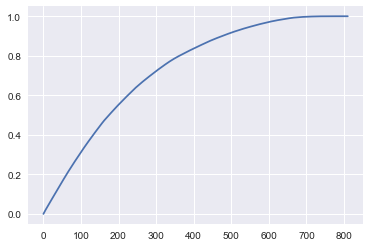

In [15]:
x0 = np.cumsum(np.sort(scores)[::-1])
x0 = (x0 - np.min(x0))/(np.max(x0) - np.min(x0))
plt.plot(np.arange(len(scores)) * 6, x0, label="MANOVA wilks lambda")

In [19]:
x1 = cum_explained_variance_manova(manova_features, scores, method.get_parameters(), 6)

In [17]:
def cum_explained_variance(full_fea, transformed_fea, normalize=True):
    explained_variances = np.var(transformed_fea, axis=0) / np.var(full_fea, axis=0).sum()
    cum_explained_variances = np.cumsum(explained_variances)
    if normalize:
        cum_explained_variances = (cum_explained_variances - np.min(cum_explained_variances)) / (np.max(cum_explained_variances) - np.min(cum_explained_variances))
    return cum_explained_variances

x2 = cum_explained_variance(manova_features, lsa_features)

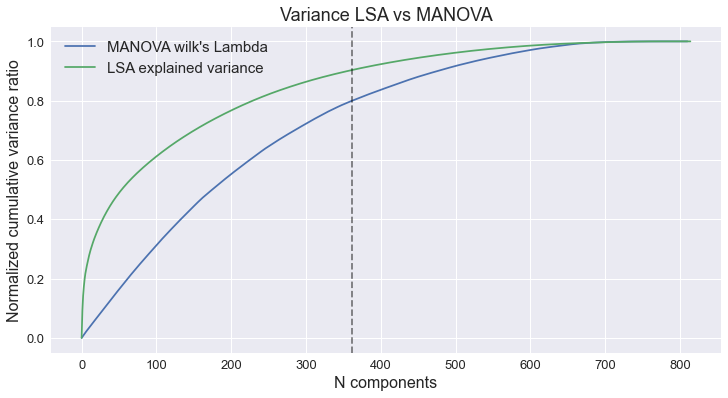

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(scores)) * 6, x0, label="MANOVA wilk's Lambda")
plt.plot(x2, label="LSA explained variance")
plt.axvline(361, color='k', linestyle="--", alpha=0.5)
# plt.plot(x3, label="LSA + DROP_ZERO_VAR")
plt.xlabel("N components", fontsize=16)
plt.ylabel("Normalized cumulative variance ratio", fontsize=16)
plt.title("Variance LSA vs MANOVA", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)
plt.savefig("figs/explained_variance.png", dpi=300)